In [1]:
import pickle

In [2]:
dadvi = pickle.load(open('./dadvi_results/dadvi_info/radon_group.pkl', 'rb'))

In [4]:
dadvi.keys()

dict_keys(['opt_result', 'fixed_draws', 'M', 'kl_hist', 'kl_stderr_hist', 'opt_sequence', 'runtime', 'newton_step_norm', 'newton_step', 'unconstrained_param_names', 'datetime', 'hostname'])

In [19]:
# I think you know most of these.
# New: kl_stderr_hist, which is the MC standard error of the ELBO over time.
# (i.e. the estimated standard deviation divided by the square root of the number of draws used to compute it)
import matplotlib.pyplot as plt
import numpy as np

n_draws = dadvi['M']

n_ops = [step['hvp_calls'] * 2 * n_draws + step['val_and_grad_calls'] * n_draws for step in dadvi['opt_sequence']]
kl_hist = dadvi['kl_hist']
kl_stderr = dadvi['kl_stderr_hist']

<ErrorbarContainer object of 3 artists>

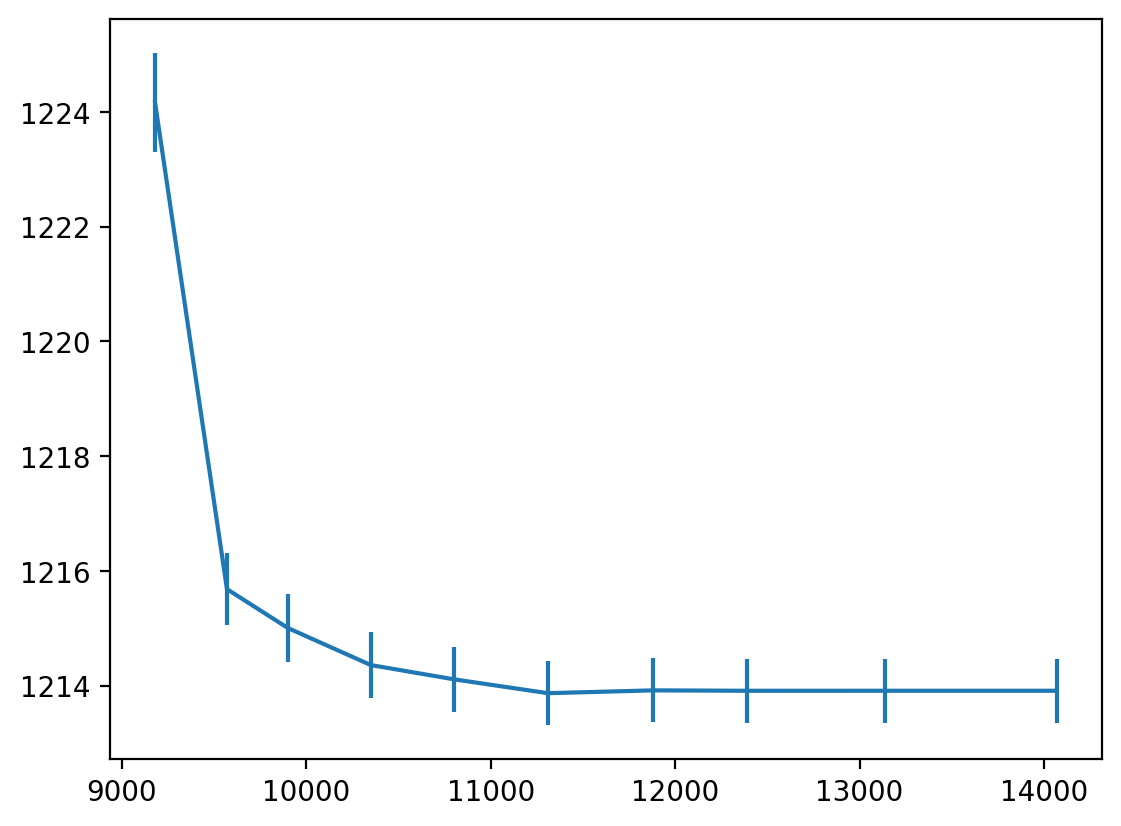

In [20]:
# In this case, it seems quite small. Does that look right?
plt.errorbar(n_ops[-10:], kl_hist[-10:], yerr=2 * np.array(kl_stderr[-10:]))

In [23]:
doubling = pickle.load(open('./lrvb_doubling_results/lrvb_info/radon_group.pkl', 'rb'))

In [24]:
doubling.keys()

dict_keys(['last_step_info', 'all_doubling_step_info', 'runtime', 'datetime', 'hostname'])

In [26]:
# The doubling now has the information for the last step ('last_step_info') as well as all the
# intermediate ones ("all_doubling_step_info")
doubling['last_step_info'].keys()

dict_keys(['opt_result', 'fixed_draws', 'M', 'kl_hist', 'opt_sequence', 'lrvb_cov', 'newton_step_norm', 'newton_step', 'unconstrained_param_names', 'ratio', 'ratio_is_ok', 'lrvb_hvp_count', 'lrvb_freq_cov_grad_count'])

In [28]:
# Note the target ratio is now 0.25. Let me know if that's too strict.
doubling['last_step_info']['ratio'], doubling['last_step_info']['M']

(0.1969668721431619, 40)

In [30]:
# We can look at the cost of LRVB stuff:
doubling['last_step_info']['lrvb_hvp_count']

180

In [31]:
# And also how many gradients were needed to compute the frequentist covariance
doubling['last_step_info']['lrvb_freq_cov_grad_count']

40

In [37]:
# Runtime for complete procedure
doubling['runtime']

4.859525680541992

In [39]:
# Compare to a single LRVB run with fixed number of draws
lrvb = pickle.load(open('./lrvb_Direct_results/lrvb_info/radon_group.pkl', 'rb'))

In [41]:
lrvb.keys()

dict_keys(['opt_result', 'fixed_draws', 'M', 'kl_hist', 'opt_sequence', 'runtime', 'runtime_lrvb', 'lrvb_cov', 'newton_step_norm', 'newton_step', 'unconstrained_param_names', 'lrvb_hvp_calls', 'datetime', 'hostname'])

In [43]:
# Total runtime
lrvb['runtime']

2.270479202270508

In [44]:
# LRVB covariance computation only
lrvb['runtime_lrvb']

0.08419156074523926

In [45]:
# This should match the other one:
lrvb['lrvb_hvp_calls']

180

In [46]:
# RAABBVI
raabbvi = pickle.load(open('./raabbvi_results/info/radon_group.pkl', 'rb'))

In [48]:
raabbvi.keys()

dict_keys(['opt_result', 'kl_hist', 'kl_hist_i', 'kl_hist_times', 'runtime', 'unconstrained_param_names', 'datetime', 'hostname'])

In [56]:
# Now also saves the times
secs = raabbvi['kl_hist_times'] - np.min(raabbvi['kl_hist_times'])

# And i is now considerably larger (because we count the 50 draws taken at each step):
raabbvi['kl_hist_i']

array([     0,    500,   1000, ..., 628000, 628500, 629000])

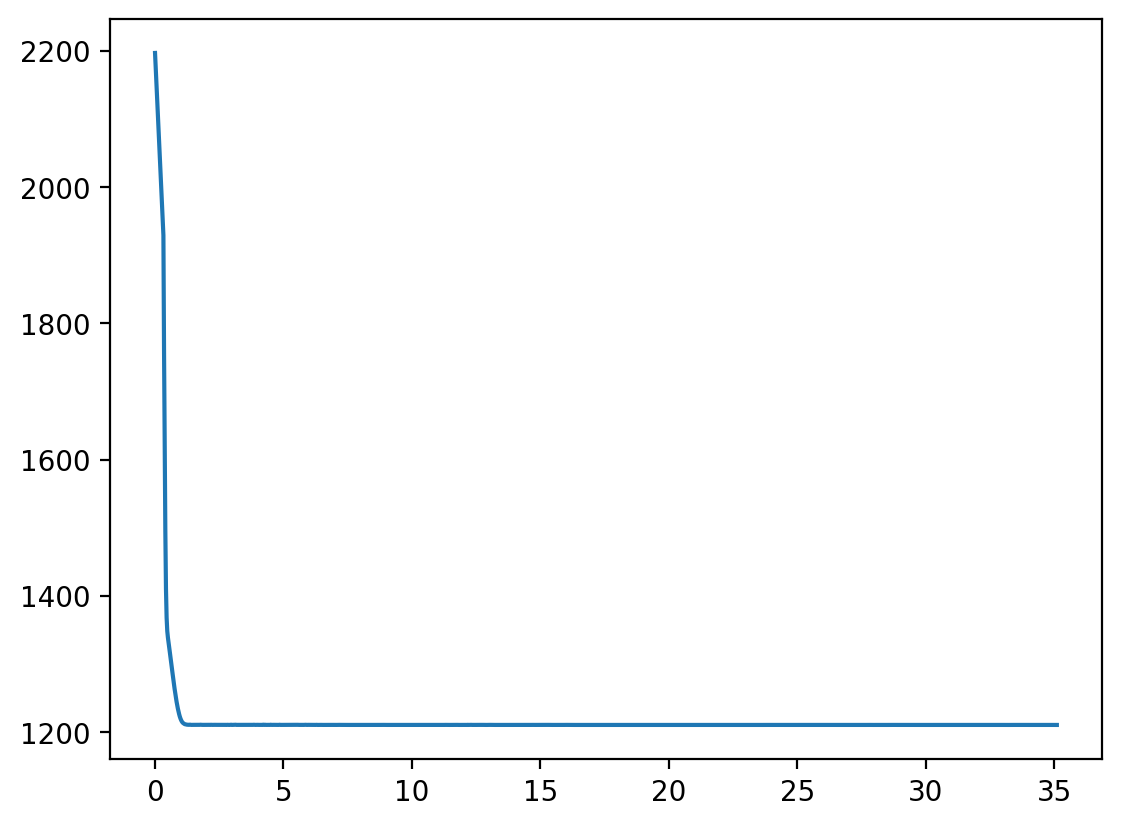

In [58]:
plt.plot(secs, raabbvi['kl_hist'])

In [59]:
# SADVI
sadvi = pickle.load(open('./sadvi_results/info/radon_group.pkl', 'rb'))

In [61]:
sadvi.keys()

dict_keys(['steps', 'runtime', 'unconstrained_param_names', 'kl_history', 'flat_params_over_time', 'datetime', 'hostname'])

In [64]:
# For SADVI, now store the flat parameter vector over time,
# which is needed to compute the convergence criterion (it looks at the size of the change in parameters)
sadvi['flat_params_over_time'][1]

array([ 1.22562524e+00, -9.99418600e-04,  9.99989273e-04,  8.98666968e-01,
       -9.58526172e-04,  9.99957747e-04,  9.98329943e-04, -9.99932513e-04,
       -9.59304263e-04,  9.99076256e-04, -9.99561368e-04,  9.99475922e-04,
       -9.99780627e-04,  9.99429872e-04,  9.99333923e-04,  9.99323724e-04,
        9.99952761e-04,  9.99977827e-04,  6.57953706e-05,  9.99380967e-04,
       -9.99851360e-04,  9.99942104e-04,  9.99999048e-04,  9.02053743e-04,
        9.99881445e-04, -9.99226295e-04,  9.98910230e-04,  9.99975709e-04,
        9.99993236e-04,  9.99999721e-04, -9.99952401e-04, -9.99651351e-04,
       -9.99774002e-04,  9.99897314e-04,  9.99811476e-04, -9.99695188e-04,
        9.99924627e-04,  9.99778563e-04,  9.99897794e-04, -9.99845535e-04,
       -9.99438831e-04,  9.99735405e-04,  9.99585825e-04, -9.99610150e-04,
        9.98686361e-04,  9.93769847e-04,  9.99980721e-04,  9.99905345e-04,
       -9.99877281e-04,  9.99915316e-04, -9.94389682e-04, -9.99950472e-04,
        9.99973319e-04,  

In [67]:
# I was pretty sure I stored the runtime at each step also, but it appears I don't.
# I will fix this.
sadvi['kl_history']

,step,kl_estimate
0,1,15229.096
1,101,13622.481
2,201,12182.179
3,301,10943.521
4,401,9957.864
...,...,...
995,99501,1211.5609
996,99601,1211.5542
997,99701,1211.5502
998,99801,1211.5498


In [ ]:
# I think those were the main things... Let me know what you think Ryan.